In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from pickle import load
import seaborn as sns

In [2]:
df = pd.read_csv("atlas3d_search_dr7.csv")
columnsNamesArr = df.columns.values
column_names = list(columnsNamesArr)
print(column_names[1:])

['objid', 'ra', 'dec', 'g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'concentration_index', 'photo_z', 'frac_dev', 'host_galaxy', 'distance', 'axis_ratio', 'category', 'radius', 'magnitude', 'u_mag', 'g_mag', 'i_mag', 'r_mag', 'z_mag', 'link']


In [3]:
objid = df['objid']
ra, dec = df['ra'], df['dec']
host_galaxy = df['host_galaxy']
distance = df['distance']
magnitude = df['magnitude']
category = df['category']
radius = df['radius']
u_mag, g_mag, r_mag, i_mag, z_mag = df['u_mag'], df['g_mag'], df['r_mag'], df['i_mag'], df['z_mag']
concentration_index = df['concentration_index']
frac_dev = df['frac_dev']
axis_ratio = df['axis_ratio']
photoz = df['photo_z']
category = df['category']
g_i, u_g, u_z, g_z, g_r = df['g-i'], df['u-g'], df['u-z'], df['g-z'], df['g-r']
magnitude = df['magnitude']
radius = df['radius']

In [4]:
category[category == 'Possible contaminants'] = 'Possible compact galaxies'

C:\Users\Home\AppData\Local\Temp/ipykernel_19120/2455194359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category[category == 'Possible contaminants'] = 'Possible compact galaxies'


In [5]:
features = ['g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'concentration_index', 'photo_z', 'frac_dev','axis_ratio','radius', 'magnitude']
print(len(features))

11


In [6]:
#make a link to sdss for this object
objid = np.array(objid)
link = []
for i in range(len(objid)):
    url = 'http://cas.sdss.org/dr7/en/tools/explore/obj.asp?id=' + str(objid[i])
    link.append(url)
link = np.array(link)

# Run 1

In [3]:
# load model
model = load(open('voting_model_PCA_v1_dr7.pkl', 'rb'))
# load the scaler
scaler = load(open('scaler_voting_model_PCA_v1_dr7.pkl', 'rb'))
# load pca
pca = load(open('pca_model_PCA_v1_dr7.pkl', 'rb'))

In [4]:
print(df.groupby('category').size())

category
Known galaxies              18
Possible contaminants    18769
dtype: int64


In [6]:
X = df.loc[:,features].values
X_scaled = scaler.transform(X)
X_pca_scaled = pca.transform(X_scaled)

In [7]:
y = model.predict(X_pca_scaled) 

In [8]:
index_1a = np.where(y == 1)[0]
print('Voting method:', len(index_1a))
index_1b = np.where(y == 0)[0]

Voting method: 210


In [12]:
# dictionary of lists  
dict = {'objid': objid[index_1a], 'ra': ra[index_1a], 'dec': dec[index_1a], 'g-i': g_mag[index_1a] - i_mag[index_1a], 'u-g': u_mag[index_1a] - g_mag[index_1a], 'u-z': u_mag[index_1a] - z_mag[index_1a], 'g-z': g_mag[index_1a] - z_mag[index_1a], 'g-r': g_mag[index_1a] - r_mag[index_1a], 'concentration_index': concentration_index[index_1a], 'photo_z': photoz[index_1a], 'frac_dev': frac_dev[index_1a], 'host_galaxy': host_galaxy[index_1a], 'distance': distance[index_1a], 'axis_ratio': axis_ratio[index_1a], 'category': category[index_1a], 'radius': radius[index_1a], 'magnitude': magnitude[index_1a], 'u_mag': u_mag[index_1a], 'g_mag': g_mag[index_1a], 'i_mag': i_mag[index_1a], 'r_mag': r_mag[index_1a], 'z_mag': z_mag[index_1a],  'link': link[index_1a]}   
df1a = pd.DataFrame(dict) 
    
# saving the dataframe 
df1a.to_csv('results_voting_dr7.csv') 

In [13]:
# dictionary of lists  
dict = {'objid': objid[index_1b], 'ra': ra[index_1b], 'dec': dec[index_1b], 'g-i': g_mag[index_1b] - i_mag[index_1b], 'u-g': u_mag[index_1b] - g_mag[index_1b], 'u-z': u_mag[index_1b] - z_mag[index_1b], 'g-z': g_mag[index_1b] - z_mag[index_1b], 'g-r': g_mag[index_1b] - r_mag[index_1b], 'concentration_index': concentration_index[index_1b], 'photo_z': photoz[index_1b], 'frac_dev': frac_dev[index_1b], 'host_galaxy': host_galaxy[index_1b], 'distance': distance[index_1b], 'axis_ratio': axis_ratio[index_1b], 'category': category[index_1b], 'radius': radius[index_1b], 'magnitude': magnitude[index_1b], 'u_mag': u_mag[index_1b], 'g_mag': g_mag[index_1b], 'i_mag': i_mag[index_1b], 'r_mag': r_mag[index_1b], 'z_mag': z_mag[index_1b],  'link': link[index_1b]}   
df1b = pd.DataFrame(dict) 
    
# saving the dataframe 
df1b.to_csv('results_voting_contaminants_dr7.csv') 

In [14]:
df1_final = pd.read_csv("results_voting_dr7.csv")

In [15]:
print(df1_final.groupby('category').size())
print('From a total of 871 host galaxies')

category
Possible compact galaxies    210
dtype: int64
From a total of 871 host galaxies


<Figure size 720x576 with 0 Axes>

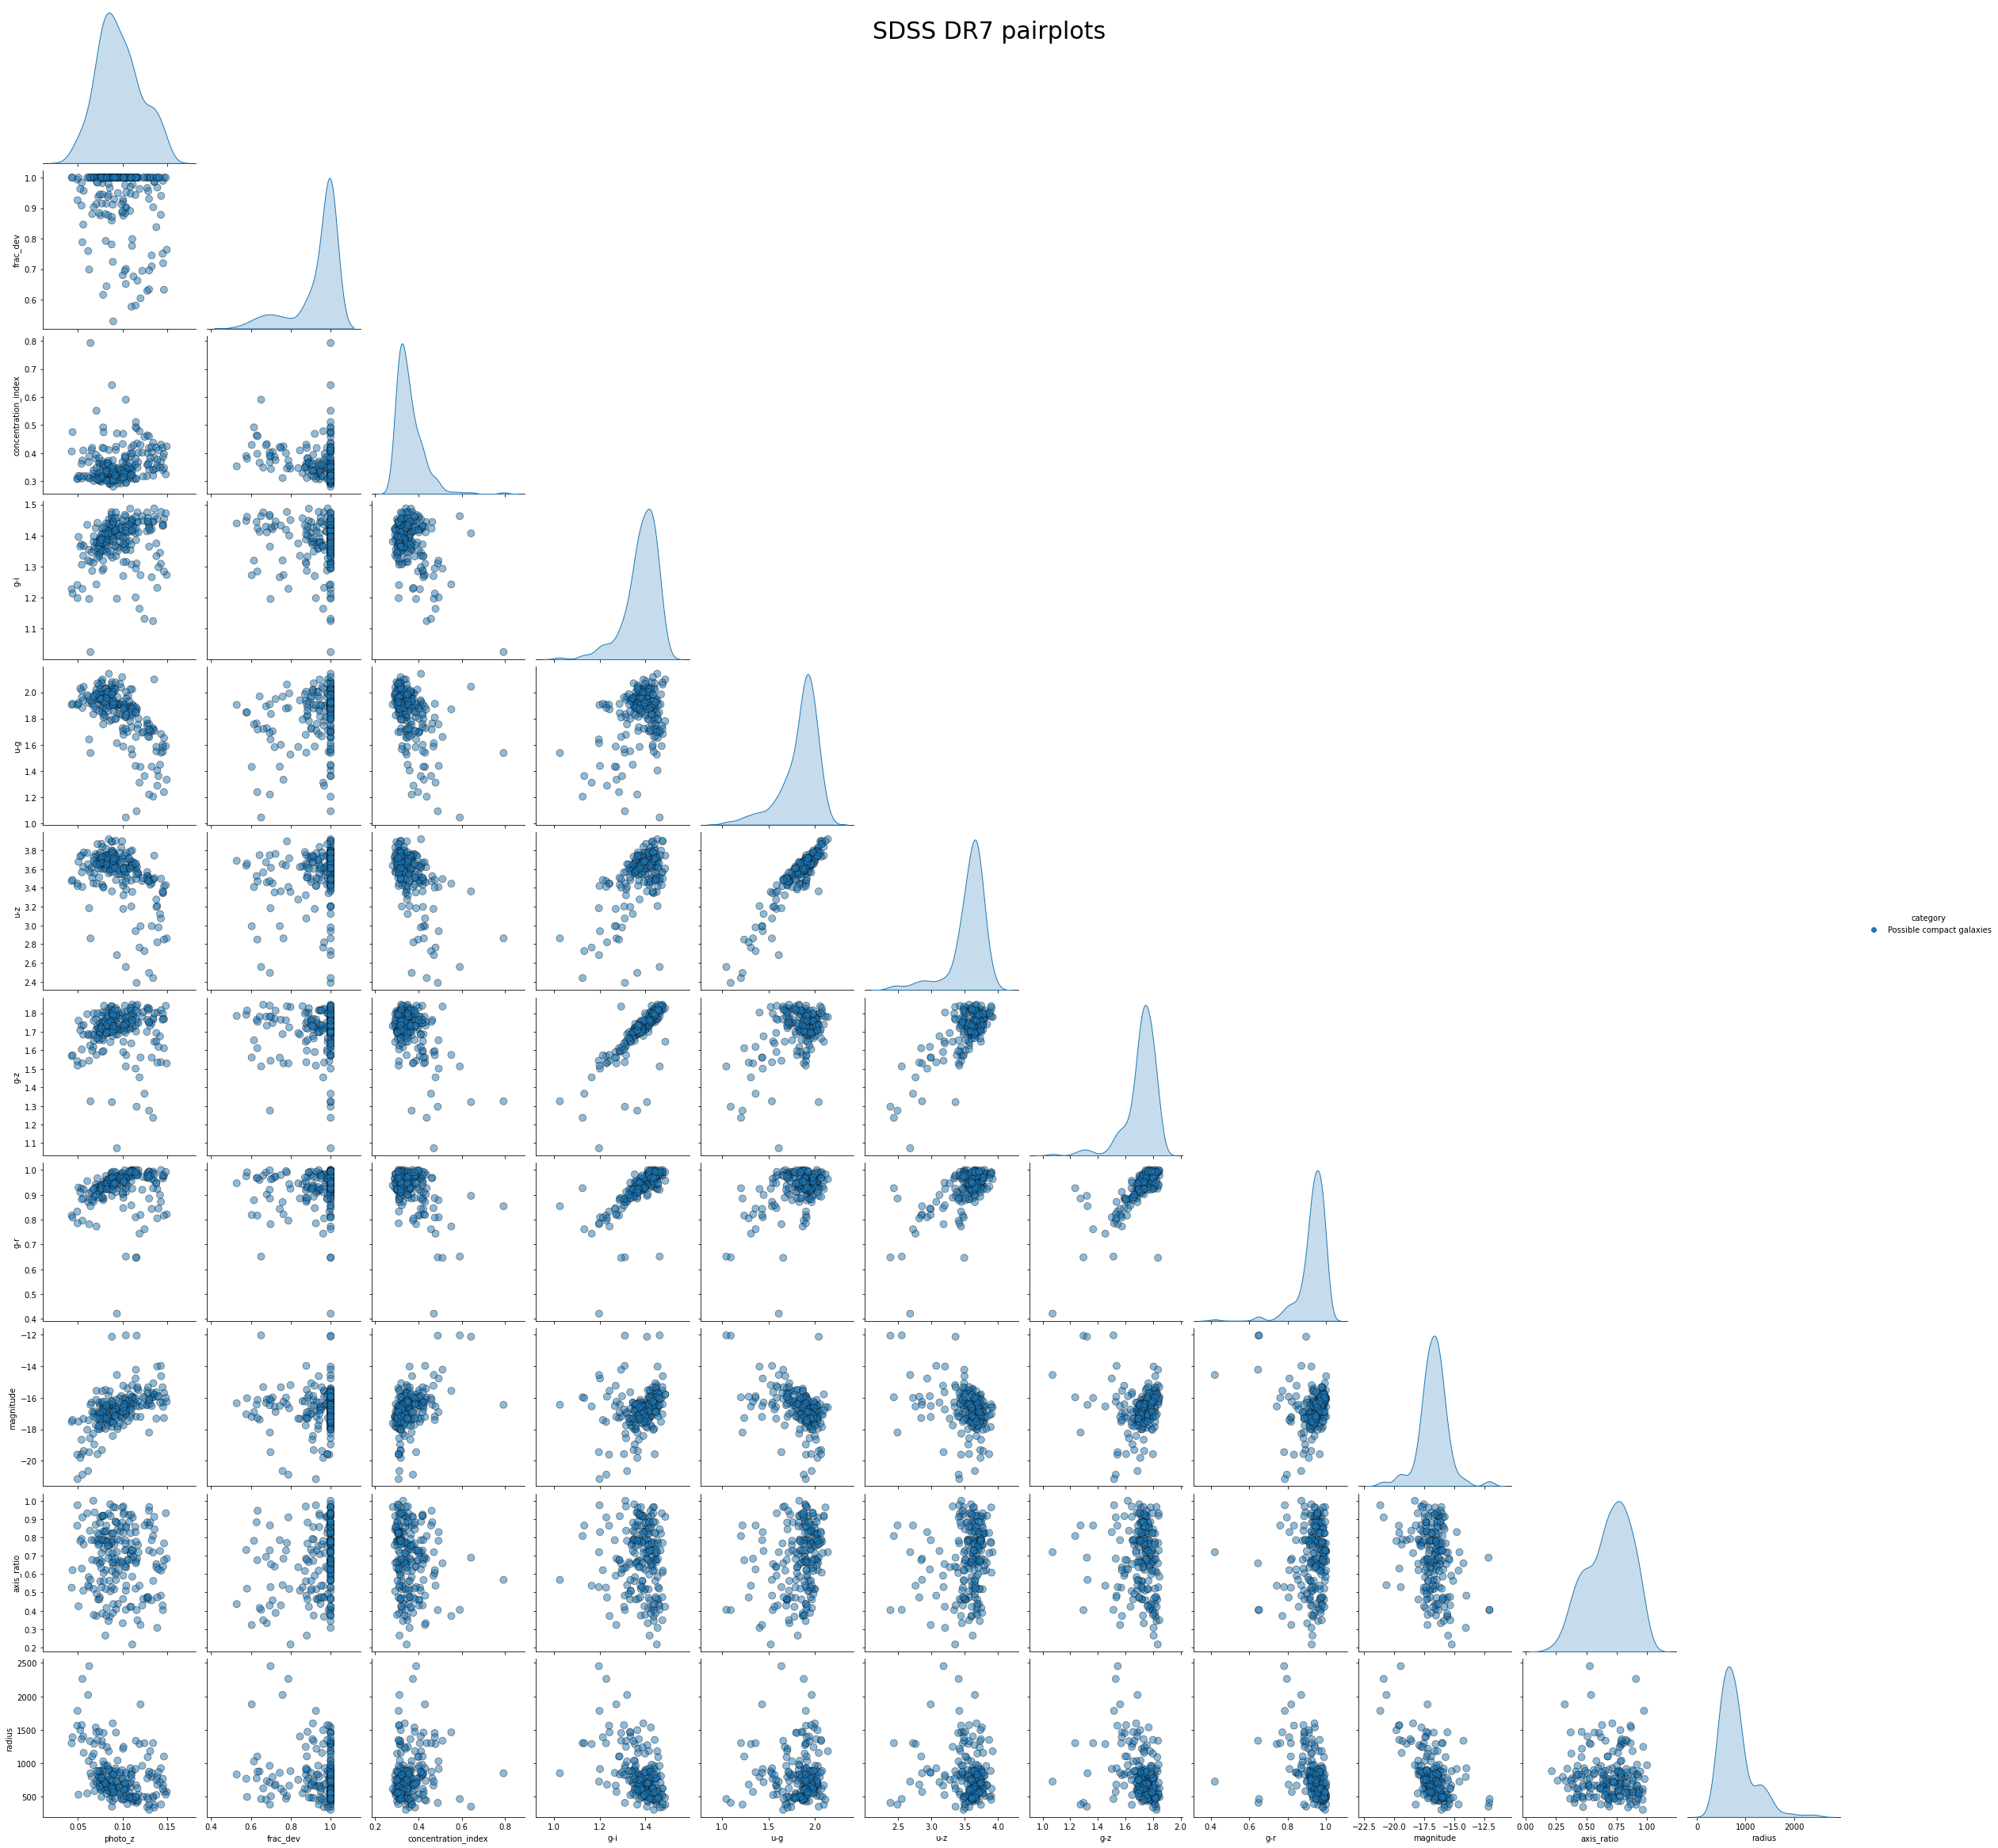

In [16]:
# %matplotlib qt
fig1 = plt.figure(figsize=(10,8))
# sns.set_context("paper", font_scale=3)
sns.pairplot(df1_final, 
             vars = ['photo_z', 'frac_dev', 'concentration_index', 'g-i', 'u-g','u-z','g-z','g-r','magnitude','axis_ratio','radius'], hue="category",
             corner=True,
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.5, 's': 80, 'edgecolor': 'k'},
             height = 3);
# plt.savefig('pairplot_voting_dr7.pdf')
# Title 
plt.suptitle('SDSS DR7 pairplots', 
             size = 30);

# 2nd Run

In [7]:
# load model
model_2 = load(open('voting_model_PCA_v2_dr7.pkl', 'rb'))
# load the scaler
scaler_2 = load(open('scaler_voting_model_PCA_v2_dr7.pkl', 'rb'))
# load pca
pca_2 = load(open('pca_model_PCA_v2_dr7.pkl', 'rb'))

In [8]:
print(df.groupby('category').size())

category
Known galaxies                  18
Possible compact galaxies    18769
dtype: int64


In [9]:
X_2 = df.loc[:,features].values
X_2_scaled= scaler_2.transform(X_2)
X_2_pca_scaled = pca_2.transform(X_2_scaled)

In [10]:
y_2 = model_2.predict(X_2_pca_scaled) 

In [11]:
index_2a = np.where(y_2 == 1)[0]
print('Voting method:', len(index_2a))
index_2b = np.where(y_2 == 0)[0]

Voting method: 1060


In [12]:
objid = df['objid']
ra, dec = df['ra'], df['dec']
host_galaxy = df['host_galaxy']
distance = df['distance']
magnitude = df['magnitude']
category = df['category']
radius = df['radius']
u_mag, g_mag, r_mag, i_mag, z_mag = df['u_mag'], df['g_mag'], df['r_mag'], df['i_mag'], df['z_mag']
concentration_index = df['concentration_index']
frac_dev = df['frac_dev']
axis_ratio = df['axis_ratio']
photoz = df['photo_z']
category = df['category']
g_i, u_g, u_z, g_z, g_r = df['g-i'], df['u-g'], df['u-z'], df['g-z'], df['g-r']
magnitude = df['magnitude']
radius = df['radius']

In [13]:
category[category == 'Possible contaminants'] = 'Possible compact galaxies'

C:\Users\Home\AppData\Local\Temp/ipykernel_19120/2455194359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category[category == 'Possible contaminants'] = 'Possible compact galaxies'


In [14]:
# dictionary of lists  
dict = {'objid': objid[index_2a], 'ra': ra[index_2a], 'dec': dec[index_2a], 'g-i': g_mag[index_2a] - i_mag[index_2a], 'u-g': u_mag[index_2a] - g_mag[index_2a], 'u-z': u_mag[index_2a] - z_mag[index_2a], 'g-z': g_mag[index_2a] - z_mag[index_2a], 'g-r': g_mag[index_2a] - r_mag[index_2a], 'concentration_index': concentration_index[index_2a], 'photo_z': photoz[index_2a], 'frac_dev': frac_dev[index_2a], 'host_galaxy': host_galaxy[index_2a], 'distance': distance[index_2a], 'axis_ratio': axis_ratio[index_2a], 'category': category[index_2a], 'radius': radius[index_2a], 'magnitude': magnitude[index_2a], 'u_mag': u_mag[index_2a], 'g_mag': g_mag[index_2a], 'i_mag': i_mag[index_2a], 'r_mag': r_mag[index_2a], 'z_mag': z_mag[index_2a],  'link': link[index_2a]}   
df2a = pd.DataFrame(dict) 
    
# saving the dataframe 
df2a.to_csv('results_voting_v2_dr7.csv') 

In [15]:
df2_final = pd.read_csv("results_voting_v2_dr7.csv")

In [17]:
print(df2_final.groupby('category').size())
print('From a total of 871 host galaxies')

category
Known galaxies                 18
Possible compact galaxies    1042
dtype: int64
From a total of 871 host galaxies


<Figure size 720x576 with 0 Axes>

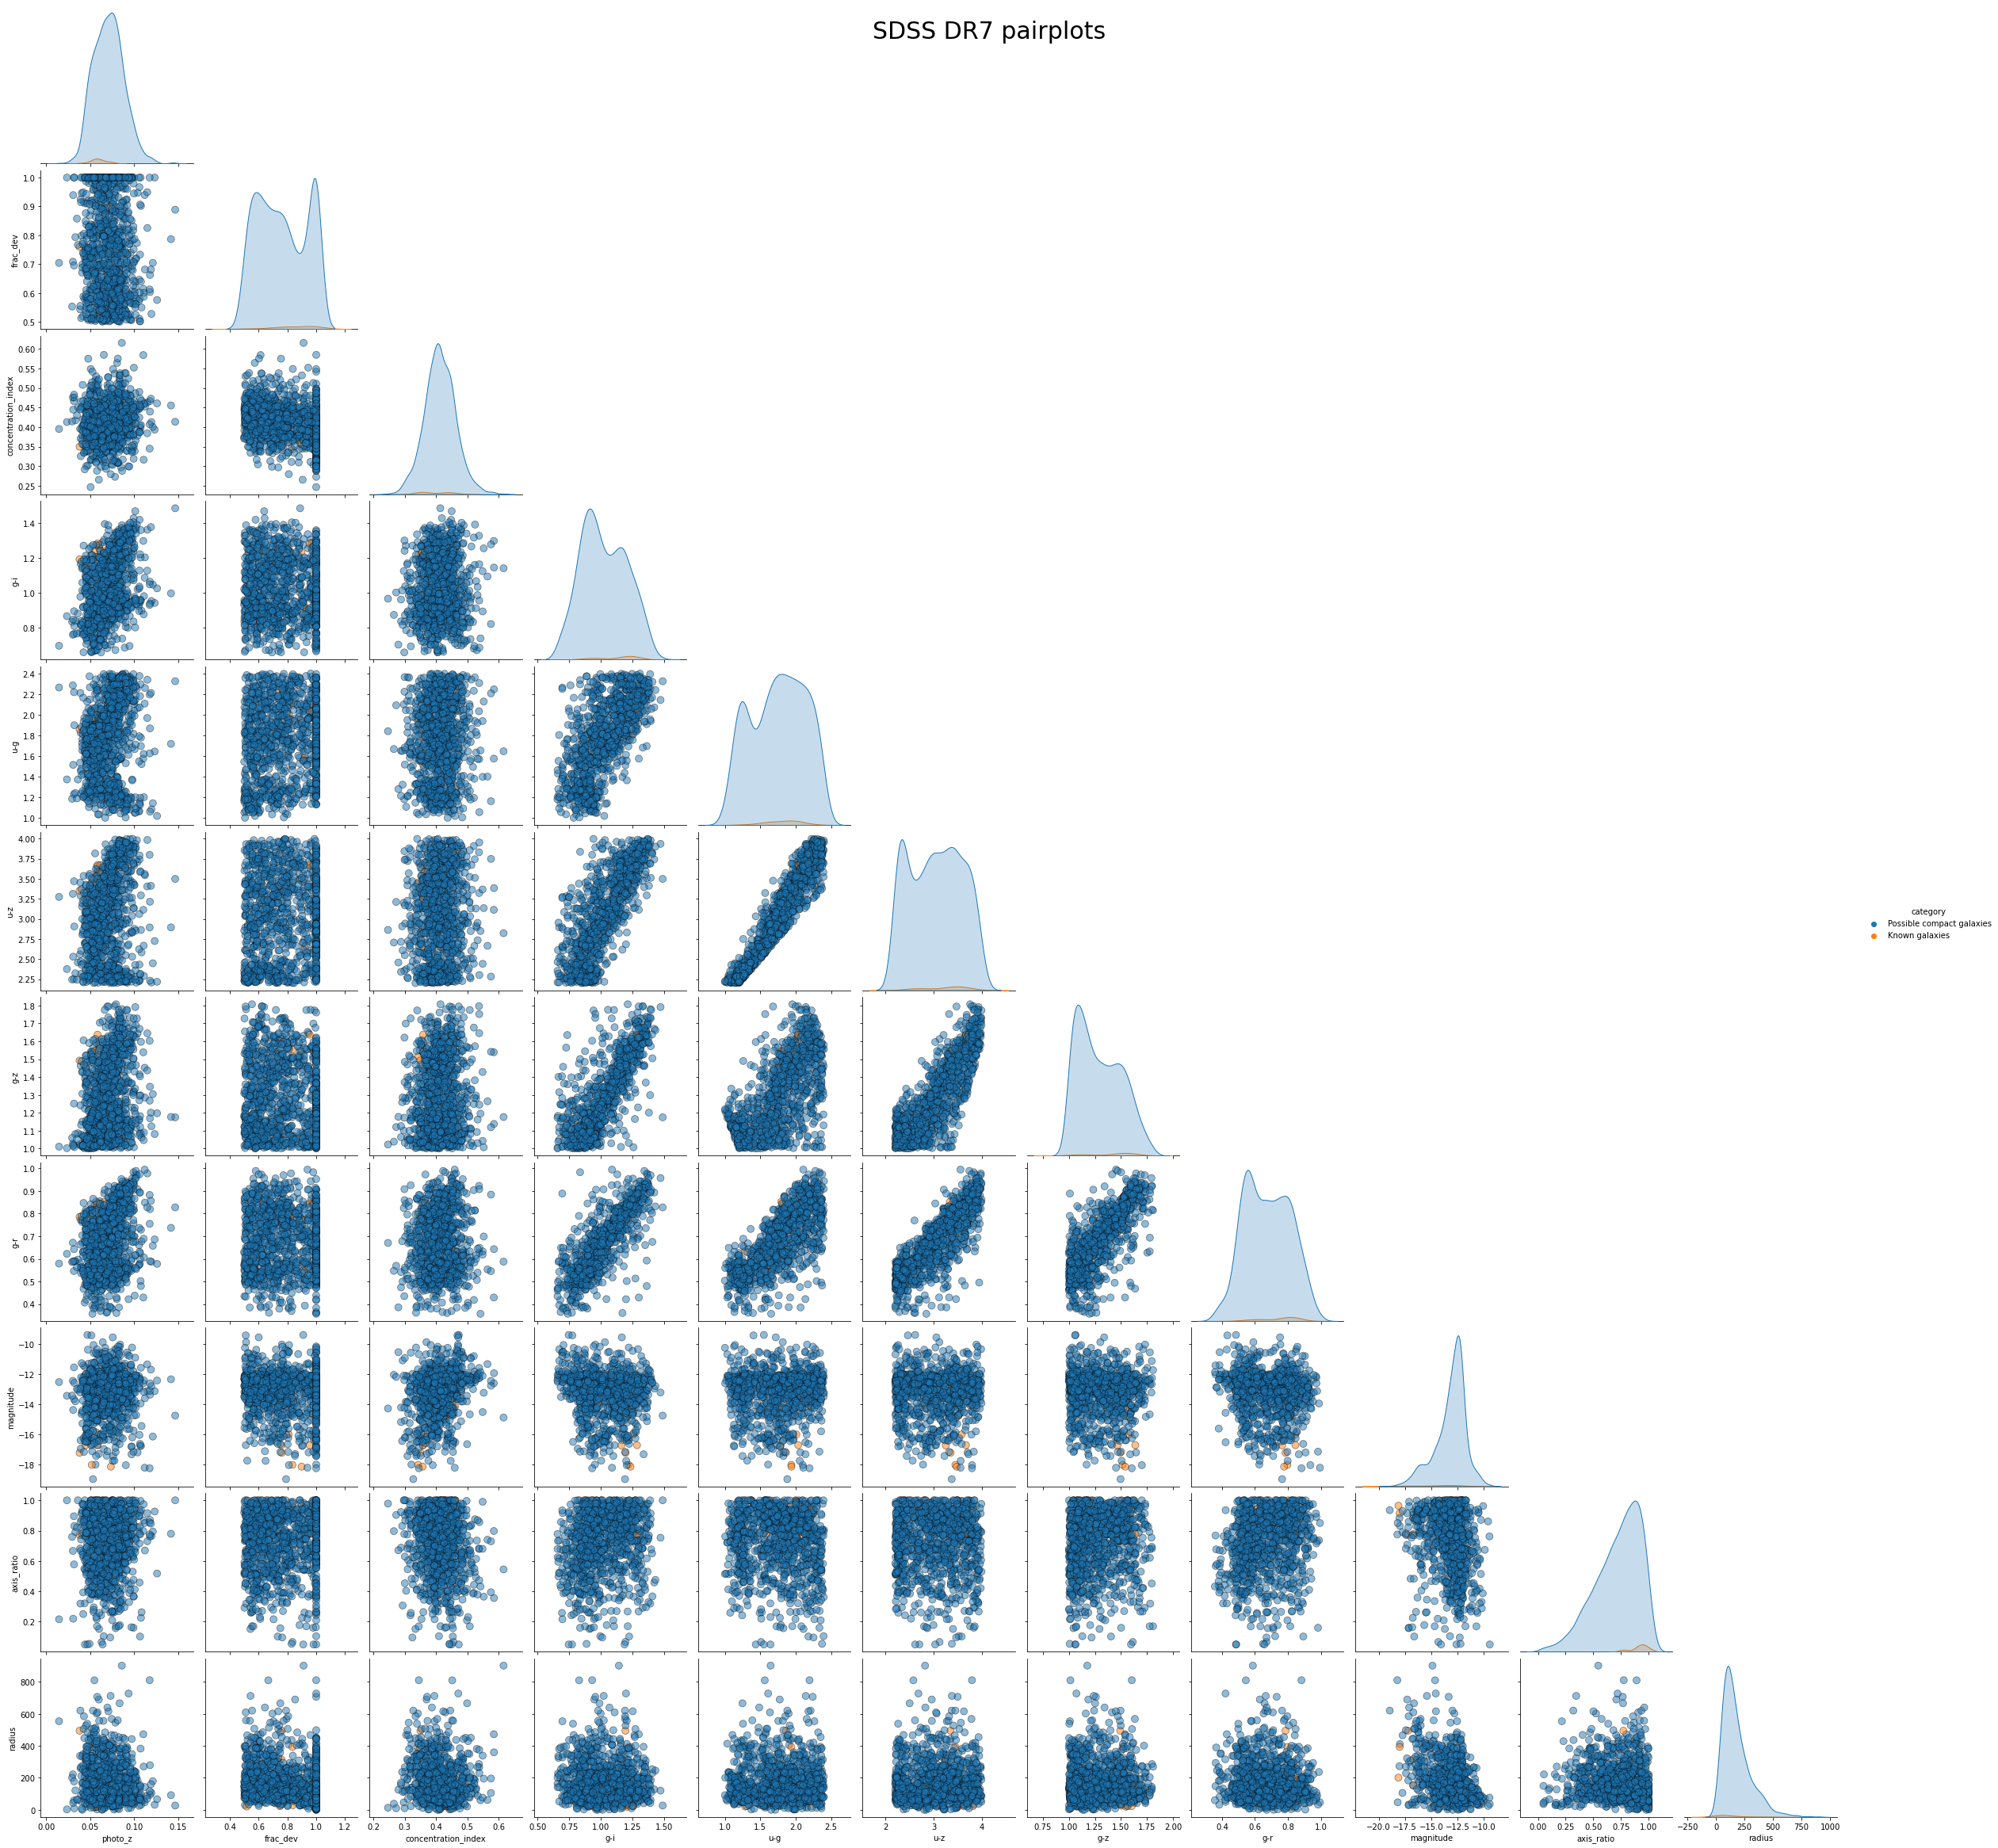

In [18]:
# %matplotlib qt
fig1 = plt.figure(figsize=(10,8))
# sns.set_context("paper", font_scale=3)
sns.pairplot(df2_final, 
             vars = ['photo_z', 'frac_dev', 'concentration_index', 'g-i', 'u-g','u-z','g-z','g-r','magnitude','axis_ratio','radius'], hue="category",
             corner=True,
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.5, 's': 80, 'edgecolor': 'k'},
             height = 3);
# plt.savefig('pairplot_voting_dr7.pdf')
# Title 
plt.suptitle('SDSS DR7 pairplots', 
             size = 30);